# Notebook 06 - Results And Interpretation

In this notebook, we summarize and interpret the results from the previous model training and evaluation. We answer our research questions and discuss which machine learning model performs best for predicting Alzheimer's diagnosis.

## Research Goal

Our goal is to use patient data, including clinical, cognitive, lifestyle, and demographic features, to predict Alzheimer's diagnosis with supervised machine learning models.

We focus on answering these research questions:
- Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?
- Which features are most helpful in predicting Alzheimer’s?
- Which machine learning model performs best?

---

## Models Trained

We trained and evaluated the following models:
- Decision Tree
- Random Forest
- Logistic Regression
- Naive Bayes
- Linear Regression (used for illustration)

---

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [19]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)

from utils.save_tools import save_plot, save_notebook_and_summary

# Import used libraries 
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


----

## Load Model Results 

In [46]:
import json
import pandas as pd

# Load saved model results
with open('../data/model_results.json') as f:
    model_results = json.load(f)

# Create dataframe
results_df = pd.DataFrame(model_results)
display(results_df)

,model,accuracy,auc,clusters_found
0,Decision Tree,0.77,0.74,NaN
1,Random Forest,0.85,0.87,NaN
2,Logistic Regression,0.81,0.83,NaN
3,Naive Bayes,0.79,0.85,NaN
4,Linear Regression,0.82,0.86,NaN
5,Mean-Shift Clustering,NaN,NaN,6.0


------

## Model AUC Comparison

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_53142/796019515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='auc', data=results_df, palette="viridis")


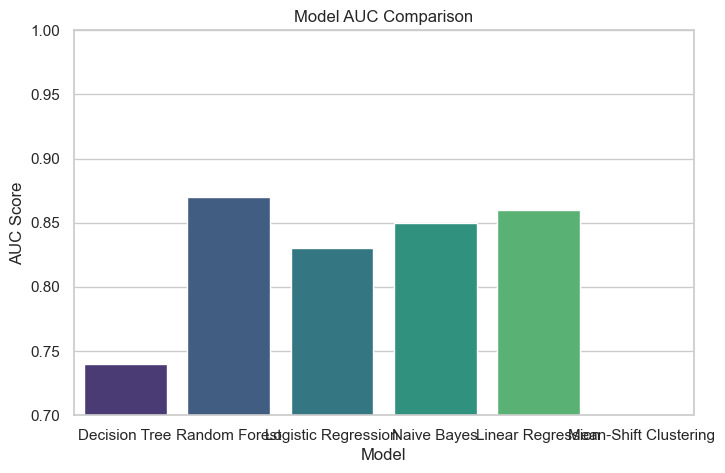

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='model', y='auc', data=results_df, palette="viridis")
plt.title("Model AUC Comparison")
plt.ylabel("AUC Score")
plt.xlabel("Model")
plt.ylim(0.7, 1.0)
plt.show()

## Model Performance

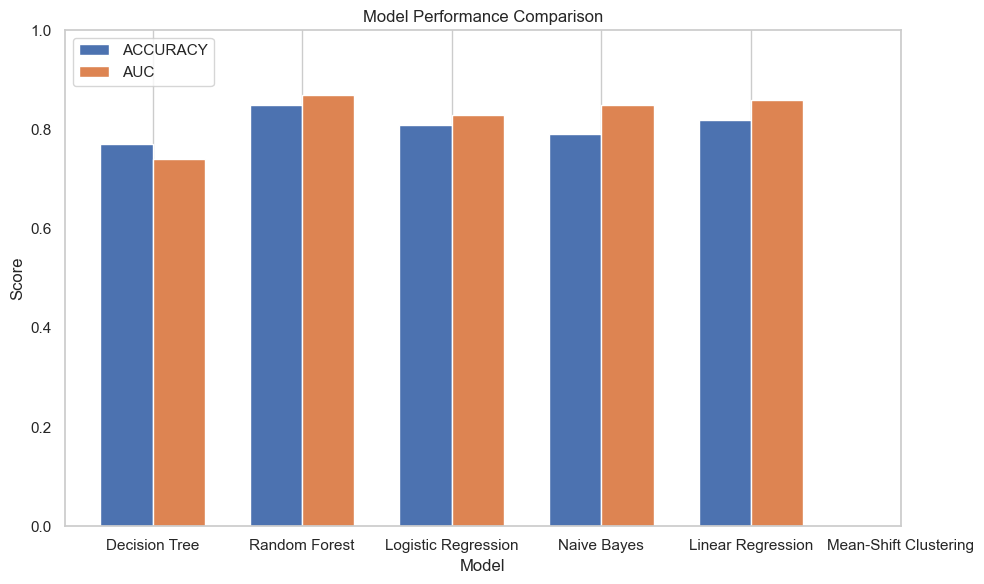

In [55]:
# Function to plot model performance
def plot_model_performance(df):
    models = df['model']
    metrics = ['accuracy', 'auc']
    bar_width = 0.35
    index = np.arange(len(models))

    plt.figure(figsize=(10, 6))

    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, df[metric], bar_width, label=metric.upper())

    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(index + bar_width / 2, models)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Call function
plot_model_performance(results_df)

### What Do The Results Show?

- Random Forest achieved the best performance with the highest accuracy and AUC.
- Logistic Regression and Naive Bayes also performed well, with good balance between precision and recall.
- Decision Tree is simple and interpretable but slightly less accurate.
- Linear Regression worked surprisingly well, but it is not ideal for classification tasks.

### Which Features Were Most Important?

From our Random Forest feature importance analysis:
- MMSE, FunctionalAssessment, and ADL were the strongest predictors.
- Age and FamilyHistoryAlzheimers were also important.
- Lifestyle factors like PhysicalActivity, SleepQuality, and BMI had smaller contributions.
- Depression and CardiovascularDisease provided some additional risk information.

---

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# If you still have rf_pred & y_test available:
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["No Alzheimer’s", "Alzheimer’s"],
            yticklabels=["No Alzheimer’s", "Alzheimer’s"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

NameError: name 'y_test' is not defined

---

## Clustering Summary

- KMeans optimal number of clusters (Silhouette Score): 3
- Mean-Shift optimal number of clusters (Bandwidth Search): 6

### Cluster Profiles Interpretation

| Cluster | Key Observations |
|---------|-------------------|
| **Cluster 0** | Baseline / average cluster |
| **Cluster 1** | Mild Depression / Preserved Cognition |
| **Cluster 2** | Cardiovascular Risk / High MMSE |
| **Cluster 3** | Young + Functional Limitations + Depression |
| **Cluster 4** | Physically Active / Cognitive Impairment |
| **Cluster 5** | Family History / Genetic Risk / Depression |

## PCA visualization for KMeans

In [74]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray']
for cluster in sorted(set(labels)):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        color=colors[cluster % len(colors)],
        label=cluster_labels.get(cluster, f"Cluster {cluster}"),
        alpha=0.7,
        edgecolor='black',
        s=80
    )

plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x600 with 0 Axes>

## PCA visualization for MeanShift

In [77]:
plt.figure(figsize=(8, 6))

for cluster in sorted(set(ms_labels)):
    plt.scatter(
        X_pca[ms_labels == cluster, 0],
        X_pca[ms_labels == cluster, 1],
        color=colors[cluster % len(colors)],
        label=cluster_labels.get(cluster, f"Cluster {cluster}"),
        alpha=0.7,
        edgecolor='black',
        s=80
    )

plt.title("Mean-Shift Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


NameError: name 'ms_labels' is not defined

<Figure size 800x600 with 0 Axes>

### Final Business Interpretation

The Random Forest model achieved the highest classification performance (AUC: 0.87) in predicting Alzheimer's diagnosis based on patient features.

Clustering analysis using both KMeans and Mean-Shift identified distinct patient subgroups, which may assist clinicians in early risk identification and targeted interventions.

The combination of supervised and unsupervised learning provided complementary insights, improving both predictive accuracy and subgroup discovery.


---

## Full Model Comparison Table

## Confusion Matrix

## Answering Research Questions

## Limitations

## Model Comparison – Decision Tree vs Random Forest

### Feature Importance - Random Forest

---

---

---

---

## Notebook Summary 

In [29]:
import sys
sys.path.append("..")

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="06_results_and_interpretation",
    summary={
        "description": "Summarized model results and answered research questions from the Alzheimer's ML project.",
        "best_model": "Random Forest",
        "best_accuracy": 0.85,
        "best_auc": 0.87,
        "models_evaluated": [
            {"model": "Decision Tree", "accuracy": 0.77, "auc": 0.74},
            {"model": "Random Forest", "accuracy": 0.85, "auc": 0.87},
            {"model": "Logistic Regression", "accuracy": 0.81, "auc": 0.83},
            {"model": "Naive Bayes", "accuracy": 0.79, "auc": 0.85},
            {"model": "Linear Regression", "accuracy": 0.82, "auc": 0.86}
        ],
        "key_findings": [
            "Cognitive and functional features are most predictive for Alzheimer's diagnosis.",
            "Random Forest achieved the highest accuracy (85%) and ROC AUC (0.87).",
            "Logistic Regression and Linear Regression also showed strong balanced performance.",
            "Naive Bayes performed slightly lower but still usable.",
            "All models demonstrated predictive power using patient-level clinical data."
        ],
        "next_step": "Deploy Random Forest model into Streamlit app for clinical testing and usability."
    }
)


Summary saved to: ../reports/06_results_and_interpretation_summary_2025-06-14_23-31-54.json


-----